# File Structure at Three Processing Levels for the Ocean Color Instrument (OCI)

**Authors:** Anna Windle (NASA, SSAI), Ian Carroll (NASA, UMBC), Carina Poulin (NASA, SSAI)

<div class="alert alert-success" role="alert">

The following notebooks are **prerequisites** for this tutorial.

- Learn with OCI: [Data Access][oci-data-access]

</div>

<div class="alert alert-info" role="alert">

An [Earthdata Login][edl] account is required to access data from the NASA Earthdata system, including NASA ocean color data.

</div>

[edl]: https://urs.earthdata.nasa.gov/
[oci-data-access]: https://oceancolor.gsfc.nasa.gov/resources/docs/tutorials/notebooks/oci_data_access/

## Summary

In this example we will use the `earthaccess` package to access OCI Level-1B (L1B), Level-2 (L2), and Level-3 (L3) NetCDF files and open them using `xarray`.

**NetCDF** ([Network Common Data Format][netcdf]) is a binary file format for storing multidimensional scientific data (variables). It is optimized for array-oriented data access and support a machine-independent format for representing scientific data. Files ending in `.nc` are NetCDF files.

**XArray** is a [package][xarray] that supports the use of multi-dimensional arrays in Python. It is widely used to handle Earth observation data, which often involves multiple dimensions — for instance, longitude, latitude, time, and channels/bands.

[netcdf]: https://www.unidata.ucar.edu/software/netcdf/
[xarray]: https://docs.xarray.dev/

## Learning Objectives

At the end of this notebok you will know:
* How to find groups in a NetCDF file
* How to use `xarray` to open OCI data
* What key variables are present in the groups within OCI L1B, L2, and L3 files

## Contents

1. [Setup](#setup)
1. [Explore L1B File Structure](#l1b)
1. [Explore L2 File Structure](#l2)
1. [Explore L3 File Structure](#l3)

<a name="setup"></a>

In [1]:
%pip install earthaccess
%pip install cartopy
%pip install xarray==2025.3.1
%pip install pandas
%pip install pathlib
%pip install h5netcdf
%pip install netCDF4

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip show xarray
%pip show earthaccess
%pip show cartopy

Name: xarray
Version: 2025.3.1
Summary: N-D labeled arrays and datasets in Python
Home-page: 
Author: 
Author-email: xarray Developers <xarray@googlegroups.com>
License: Apache-2.0
Location: /Users/muthumayan/anaconda3/lib/python3.10/site-packages
Requires: numpy, packaging, pandas
Required-by: datashader
Note: you may need to restart the kernel to use updated packages.
Name: earthaccess
Version: 0.14.0
Summary: Client library for NASA Earthdata APIs
Home-page: 
Author: earthaccess contributors
Author-email: 
License: 
Location: /Users/muthumayan/anaconda3/lib/python3.10/site-packages
Requires: fsspec, importlib-resources, multimethod, pqdm, python-cmr, requests, s3fs, tinynetrc, typing-extensions
Required-by: 
Note: you may need to restart the kernel to use updated packages.
Name: Cartopy
Version: 0.24.1
Summary: A Python library for cartographic visualizations with Matplotlib
Home-page: 
Author: UK Met Office
Author-email: 
License: BSD 3-Clause License
        
        Copyright (c)

## 1. Setup

Begin by importing all of the packages used in this notebook. If your kernel uses an environment defined following the guidance on the [tutorials] page, then the imports will be successful.

[tutorials]: https://oceancolor.gsfc.nasa.gov/resources/docs/tutorials

In [3]:
import cartopy.crs as ccrs
import earthaccess
import h5netcdf
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import pathlib
from xarray.backends.api import open_datatree

Set (and persist to your user profile on the host, if needed) your Earthdata Login credentials.

In [4]:
auth = earthaccess.login(persist=True)

[back to top](#contents) <a name="l1b"></a>

In [5]:
results = earthaccess.search_datasets(instrument="oci")
for item in results:
    summary = item.summary()
    print(summary["short-name"])

PACE_OCI_L0_SCI
PACE_OCI_L1A_SCI
PACE_OCI_L1B_SCI
PACE_OCI_L1C_SCI
PACE_OCI_L2_AOP
PACE_OCI_L2_AOP_NRT
PACE_OCI_L2_BGC
PACE_OCI_L2_BGC_NRT
PACE_OCI_L2_CLOUD
PACE_OCI_L2_CLOUD_MASK
PACE_OCI_L2_CLOUD_MASK_NRT
PACE_OCI_L2_CLOUD_NRT
PACE_OCI_L2_IOP
PACE_OCI_L2_IOP_NRT
PACE_OCI_L2_LANDVI
PACE_OCI_L2_LANDVI_NRT
PACE_OCI_L2_PAR
PACE_OCI_L2_PAR_NRT
PACE_OCI_L2_SFREFL
PACE_OCI_L2_SFREFL_NRT
PACE_OCI_L3B_AVW
PACE_OCI_L3B_AVW_NRT
PACE_OCI_L3B_CARBON
PACE_OCI_L3B_CARBON_NRT
PACE_OCI_L3B_CHL
PACE_OCI_L3B_CHL_NRT
PACE_OCI_L3B_FLH
PACE_OCI_L3B_FLH_NRT
PACE_OCI_L3B_IOP
PACE_OCI_L3B_IOP_NRT
PACE_OCI_L3B_KD
PACE_OCI_L3B_KD_NRT
PACE_OCI_L3B_LANDVI
PACE_OCI_L3B_LANDVI_NRT
PACE_OCI_L3B_PAR
PACE_OCI_L3B_PAR_NRT
PACE_OCI_L3B_POC
PACE_OCI_L3B_POC_NRT
PACE_OCI_L3B_RRS
PACE_OCI_L3B_RRS_NRT
PACE_OCI_L3B_SFREFL
PACE_OCI_L3B_SFREFL_NRT
PACE_OCI_L3M_AVW
PACE_OCI_L3M_AVW_NRT
PACE_OCI_L3M_CARBON
PACE_OCI_L3M_CARBON_NRT
PACE_OCI_L3M_CHL
PACE_OCI_L3M_CHL_NRT
PACE_OCI_L3M_CLOUD
PACE_OCI_L3M_CLOUD_NRT
PACE_OCI_L3M_FLH
PA

Now you can project the data onto a grid. If you wanna get fancy, add a coastline.

## 4. Explore L3 File Structure

At Level-3 there are binned (B) and mapped (M) products available for OCI. The L3M remote sensing reflectance (Rrs) files contain global maps of Rrs. We'll use the same `earthaccess` method to find the data.

In [6]:
tspan = ("2024-08-01", "2024-08-30")
bbox = bbox = (-85, 40, -80, 43)

results = earthaccess.search_data(
    short_name="PACE_OCI_L3M_RRS",
    granule_name="*.MO.*.4km.*",
    temporal=tspan,
    bounding_box=bbox,
)

In [7]:
results[0]

Collection: {'Version': '3.0', 'ShortName': 'PACE_OCI_L3M_RRS'}
Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'BoundingRectangles': [{'EastBoundingCoordinate': 180, 'WestBoundingCoordinate': -180, 'NorthBoundingCoordinate': 90, 'SouthBoundingCoordinate': -90}]}}}
Temporal coverage: {'RangeDateTime': {'EndingDateTime': '2024-08-31T23:59:59Z', 'BeginningDateTime': '2024-08-01T00:00:00Z'}}
Size(MB): 2599.1027154922485
Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240801_20240831.L3m.MO.RRS.V3_0.Rrs.4km.nc']

In [8]:
import pathlib
directory = pathlib.Path("PACE_OCI_L3")
directory.mkdir(exist_ok=True)
paths = earthaccess.download(results, directory)


QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
paths

['PACE_OCI_L3/PACE_OCI.20240801_20240831.L3m.MO.RRS.V3_0.Rrs.4km.nc']

In [10]:
dataset = xr.open_dataset(paths[0], engine='h5netcdf')
dataset

<xarray.Dataset> Size: 26GB
Dimensions:     (wavelength: 172, lat: 4320, lon: 8640, rgb: 3,
                 eightbitcolor: 256)
Coordinates:
  * wavelength  (wavelength) float64 1kB 346.0 348.0 351.0 ... 714.0 717.0 719.0
  * lat         (lat) float32 17kB 89.98 89.94 89.9 ... -89.9 -89.94 -89.98
  * lon         (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    Rrs         (lat, lon, wavelength) float32 26GB ...
    palette     (rgb, eightbitcolor) uint8 768B ...
Attributes: (12/64)
    product_name:                      PACE_OCI.20240801_20240831.L3m.MO.RRS....
    instrument:                        OCI
    title:                             OCI Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          PACE
    source:                            satellite observations from OCI-PACE
    ...                                ...
    identifier_product_doi:            10.5067/PACE/OCI/L3M/RRS/3.0
    keywords:                          Earth Science > Oceans > Ocean Optics ...
    keywords_vocabulary:               NASA Global Change Master Directory (G...
    data_bins:                         18409747
    data_minimum:                      -0.010000003
    data_maximum:                      0.098129526

Notice that OCI L3M data has `lat` and `lon` coordinates, so it's easy to slice out a bounding box and map the "Rrs_442" variable.

In [11]:
dataset["wavelength"].data

array([346., 348., 351., 353., 356., 358., 361., 363., 366., 368., 371.,
       373., 375., 378., 380., 383., 385., 388., 390., 393., 395., 398.,
       400., 403., 405., 408., 410., 413., 415., 418., 420., 422., 425.,
       427., 430., 432., 435., 437., 440., 442., 445., 447., 450., 452.,
       455., 457., 460., 462., 465., 467., 470., 472., 475., 477., 480.,
       482., 485., 487., 490., 492., 495., 497., 500., 502., 505., 507.,
       510., 512., 515., 517., 520., 522., 525., 527., 530., 532., 535.,
       537., 540., 542., 545., 547., 550., 553., 555., 558., 560., 563.,
       565., 568., 570., 573., 575., 578., 580., 583., 586., 588., 613.,
       615., 618., 620., 623., 625., 627., 630., 632., 635., 637., 640.,
       641., 642., 643., 645., 646., 647., 648., 650., 651., 652., 653.,
       655., 656., 657., 658., 660., 661., 662., 663., 665., 666., 667.,
       668., 670., 671., 672., 673., 675., 676., 677., 678., 679., 681.,
       682., 683., 684., 686., 687., 688., 689., 69

In [12]:
#rrs_rgb = dataset["Rrs"].sel({"wavelength": [645, 555, 450]})
rrs_rgb = dataset["Rrs"].sel({"wavelength": [645, 580, 450]})
rrs_rgb

<xarray.DataArray 'Rrs' (lat: 4320, lon: 8640, wavelength: 3)> Size: 448MB
[111974400 values with dtype=float32]
Coordinates:
  * wavelength  (wavelength) float64 24B 645.0 580.0 450.0
  * lat         (lat) float32 17kB 89.98 89.94 89.9 ... -89.9 -89.94 -89.98
  * lon         (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
Attributes:
    long_name:      Remote sensing reflectance
    units:          sr^-1
    standard_name:  surface_ratio_of_upwelling_radiance_emerging_from_sea_wat...
    valid_min:      -30000
    valid_max:      25000
    display_scale:  linear
    display_min:    0.0
    display_max:    0.025

In [13]:
rrs_rgb["channel"] = ("wavelength", ["Reds", "Greens", "Blues"])
rrs_rgb = rrs_rgb.swap_dims({"wavelength": "channel"})
rrs_rgb

<xarray.DataArray 'Rrs' (lat: 4320, lon: 8640, channel: 3)> Size: 448MB
[111974400 values with dtype=float32]
Coordinates:
    wavelength  (channel) float64 24B 645.0 580.0 450.0
  * lat         (lat) float32 17kB 89.98 89.94 89.9 ... -89.9 -89.94 -89.98
  * lon         (lon) float32 35kB -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * channel     (channel) <U6 72B 'Reds' 'Greens' 'Blues'
Attributes:
    long_name:      Remote sensing reflectance
    units:          sr^-1
    standard_name:  surface_ratio_of_upwelling_radiance_emerging_from_sea_wat...
    valid_min:      -30000
    valid_max:      25000
    display_scale:  linear
    display_min:    0.0
    display_max:    0.025

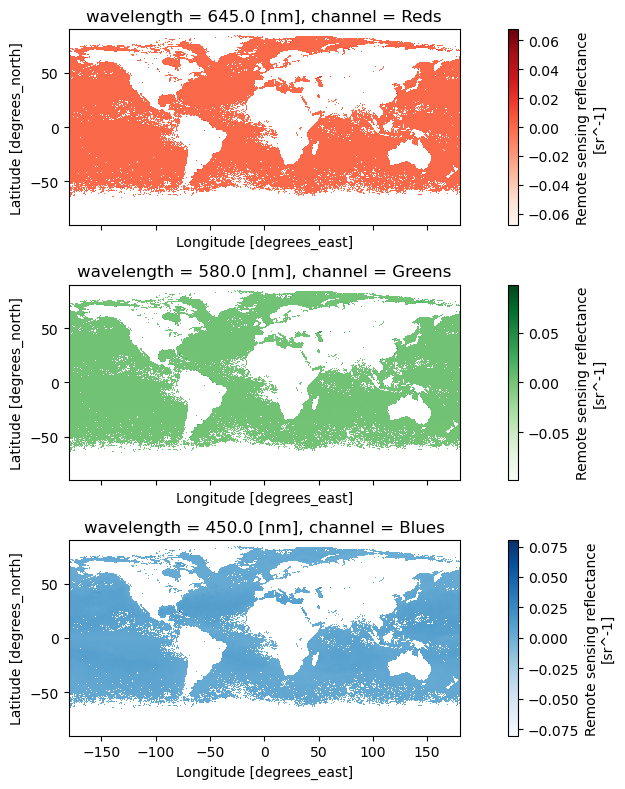

In [14]:
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
for i, item in enumerate(rrs_rgb["channel"]):
    array = rrs_rgb.sel({"channel": item})
    array.plot.imshow(x="lon", y="lat", cmap=item.item(), ax=axs[i])
    axs[i].set_aspect("equal")
fig.tight_layout()
plt.show()

/Users/muthumayan/anaconda3/lib/python3.10/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


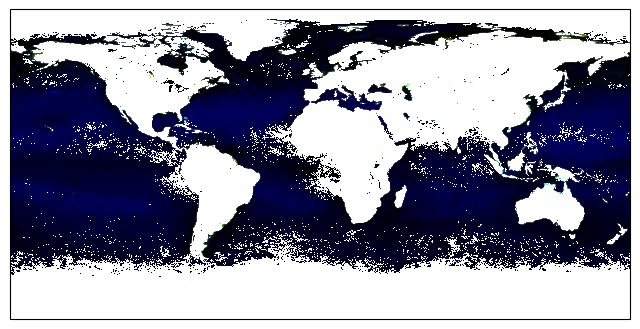

In [15]:
fig = plt.figure(figsize=(8, 7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(color="white", linewidth=.5, alpha=.4)
ax.set_facecolor("white")
artist = rrs_rgb.plot.imshow(x="lon", y="lat", vmin=0.001, vmax=0.029, interpolation="none")
plt.show()

/Users/muthumayan/anaconda3/lib/python3.10/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


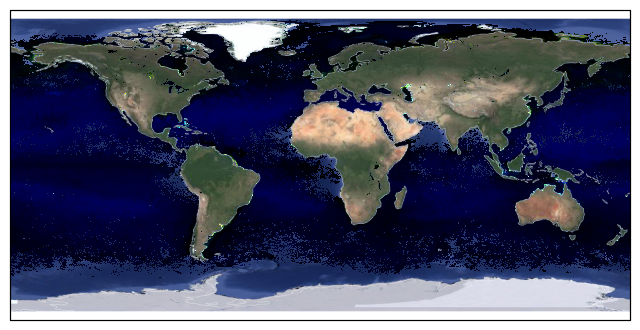

In [16]:
import cartopy.io.img_tiles as cimgt
fig = plt.figure(figsize=(8,7))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.add_image(cimgt.GoogleTiles(style="satellite"), 2)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines(color="white", linewidth=.5, alpha=.4)
ax.set_facecolor("none")
artist = rrs_rgb.plot.imshow(x="lon", y="lat", vmin=0.001, vmax=0.029, interpolation="none")
plt.show()

/Users/muthumayan/anaconda3/lib/python3.10/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


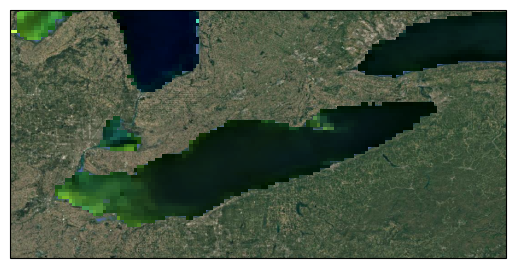

In [17]:
fig = plt.figure()
extent = [-84, -78, 41, 44]  # (longitude min, longitude max, latitude min, latitude max)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.add_image(cimgt.GoogleTiles(style="satellite"), 8)
ax.coastlines(color="white", linewidth=.5, alpha=.9)
artist = rrs_rgb.plot.imshow(x="lon", y="lat", vmin=0.000, vmax=0.029, interpolation="none", zorder=1)
plt.show()

In [18]:
tspan = ("2024-08-01", "2024-08-28")
bbox = (-85, 40, -80, 43)
clouds = (0, 50)
results = earthaccess.search_data(
    short_name="PACE_OCI_L2_AOP",
    temporal=tspan,
    bounding_box=bbox,
    cloud_cover=clouds,
)
results

[Collection: {'Version': '3.0', 'ShortName': 'PACE_OCI_L2_AOP'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 60.87332, 'Longitude': -71.65771}, {'Latitude': 53.71627, 'Longitude': -115.61845}, {'Latitude': 37.44713, 'Longitude': -102.8528}, {'Latitude': 43.16999, 'Longitude': -71.90421}, {'Latitude': 60.87332, 'Longitude': -71.65771}]}}]}}}
 Temporal coverage: {'RangeDateTime': {'BeginningDateTime': '2024-08-02T18:22:18Z', 'EndingDateTime': '2024-08-02T18:27:17Z'}}
 Size(MB): 50.331153869628906
 Data: ['https://obdaac-tea.earthdatacloud.nasa.gov/ob-cumulus-prod-public/PACE_OCI.20240802T182218.L2.OC_AOP.V3_0.nc'],
 Collection: {'ShortName': 'PACE_OCI_L2_AOP', 'Version': '3.0'}
 Spatial coverage: {'HorizontalSpatialDomain': {'Geometry': {'GPolygons': [{'Boundary': {'Points': [{'Latitude': 42.9095, 'Longitude': -80.54308}, {'Latitude': 37.19848, 'Longitude': -111.37573}, {'Latitude': 14.69649, 'Longitude': -102.67831}, {'

In [19]:
paths = earthaccess.download(results[5], local_path="L2_data")
paths

QUEUEING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/1 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/1 [00:00<?, ?it/s]

['L2_data/PACE_OCI.20240824T175436.L2.OC_AOP.V3_0.nc']

In [20]:
%pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [21]:
datatree = open_datatree(paths[0])
datatree

/var/folders/1m/zm96cqs562qbmk_ptx3wwjy00000gn/T/ipykernel_32075/995226554.py:1: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  datatree = open_datatree(paths[0])


<xarray.DataTree>
Group: /
│   Attributes: (12/45)
│       title:                             OCI Level-2 Data AOP
│       product_name:                      PACE_OCI.20240824T175436.L2.OC_AOP.V3_...
│       processing_version:                3.0
│       history:                           l2gen par=/data13/sdpsoper/vdc/vpu12/w...
│       instrument:                        OCI
│       platform:                          PACE
│       ...                                ...
│       geospatial_lon_max:                -64.95671
│       geospatial_lon_min:                -103.40679
│       startDirection:                    Ascending
│       endDirection:                      Ascending
│       day_night_flag:                    Day
│       earth_sun_distance_correction:     0.9786028265953064
├── Group: /sensor_band_parameters
│       Dimensions:        (number_of_bands: 286, wavelength_3d: 172,
│                           number_of_reflective_bands: 286)
│       Coordinates:
│         * wavelength_3d  (wavelength_3d) float64 1kB 346.0 348.0 351.0 ... 717.0 719.0
│       Dimensions without coordinates: number_of_bands, number_of_reflective_bands
│       Data variables:
│           wavelength     (number_of_bands) float64 2kB ...
│           vcal_gain      (number_of_reflective_bands) float32 1kB ...
│           vcal_offset    (number_of_reflective_bands) float32 1kB ...
│           F0             (number_of_reflective_bands) float32 1kB ...
│           aw             (number_of_reflective_bands) float32 1kB ...
│           bbw            (number_of_reflective_bands) float32 1kB ...
│           k_oz           (number_of_reflective_bands) float32 1kB ...
│           k_no2          (number_of_reflective_bands) float32 1kB ...
│           Tau_r          (number_of_reflective_bands) float32 1kB ...
├── Group: /scan_line_attributes
│       Dimensions:  (number_of_lines: 1710)
│       Dimensions without coordinates: number_of_lines
│       Data variables: (12/13)
│           year     (number_of_lines) float64 14kB ...
│           day      (number_of_lines) timedelta64[ns] 14kB ...
│           msec     (number_of_lines) timedelta64[ns] 14kB ...
│           time     (number_of_lines) datetime64[ns] 14kB ...
│           detnum   (number_of_lines) float32 7kB ...
│           mside    (number_of_lines) float32 7kB ...
│           ...       ...
│           clon     (number_of_lines) float32 7kB ...
│           elon     (number_of_lines) float32 7kB ...
│           slat     (number_of_lines) float32 7kB ...
│           clat     (number_of_lines) float32 7kB ...
│           elat     (number_of_lines) float32 7kB ...
│           csol_z   (number_of_lines) float32 7kB ...
├── Group: /geophysical_data
│       Dimensions:   (number_of_lines: 1710, pixels_per_line: 1272, wavelength_3d: 172)
│       Dimensions without coordinates: number_of_lines, pixels_per_line, wavelength_3d
│       Data variables:
│           Rrs       (number_of_lines, pixels_per_line, wavelength_3d) float32 1GB ...
│           Rrs_unc   (number_of_lines, pixels_per_line, wavelength_3d) float32 1GB ...
│           aot_865   (number_of_lines, pixels_per_line) float32 9MB ...
│           angstrom  (number_of_lines, pixels_per_line) float32 9MB ...
│           avw       (number_of_lines, pixels_per_line) float32 9MB ...
│           nflh      (number_of_lines, pixels_per_line) float32 9MB ...
│           l2_flags  (number_of_lines, pixels_per_line) int32 9MB ...
├── Group: /navigation_data
│       Dimensions:    (number_of_lines: 1710, pixels_per_line: 1272)
│       Dimensions without coordinates: number_of_lines, pixels_per_line
│       Data variables:
│           longitude  (number_of_lines, pixels_per_line) float32 9MB ...
│           latitude   (number_of_lines, pixels_per_line) float32 9MB ...
│           tilt       (number_of_lines) float32 7kB ...
│       Attributes:
│           gringpointlongitude:  [ -93.33035  -64.95671  -65.7146  -103.40679]
│           gringpointlatitude:   [

In [22]:
dataset = xr.merge(datatree.to_dict().values())
dataset

<xarray.Dataset> Size: 3GB
Dimensions:        (number_of_bands: 286, number_of_reflective_bands: 286,
                    wavelength_3d: 172, number_of_lines: 1710,
                    pixels_per_line: 1272)
Coordinates:
  * wavelength_3d  (wavelength_3d) float64 1kB 346.0 348.0 351.0 ... 717.0 719.0
Dimensions without coordinates: number_of_bands, number_of_reflective_bands,
                                number_of_lines, pixels_per_line
Data variables: (12/32)
    wavelength     (number_of_bands) float64 2kB ...
    vcal_gain      (number_of_reflective_bands) float32 1kB ...
    vcal_offset    (number_of_reflective_bands) float32 1kB ...
    F0             (number_of_reflective_bands) float32 1kB ...
    aw             (number_of_reflective_bands) float32 1kB ...
    bbw            (number_of_reflective_bands) float32 1kB ...
    ...             ...
    avw            (number_of_lines, pixels_per_line) float32 9MB ...
    nflh           (number_of_lines, pixels_per_line) float32 9MB ...
    l2_flags       (number_of_lines, pixels_per_line) int32 9MB ...
    longitude      (number_of_lines, pixels_per_line) float32 9MB ...
    latitude       (number_of_lines, pixels_per_line) float32 9MB ...
    tilt           (number_of_lines) float32 7kB ...
Attributes: (12/45)
    title:                             OCI Level-2 Data AOP
    product_name:                      PACE_OCI.20240824T175436.L2.OC_AOP.V3_...
    processing_version:                3.0
    history:                           l2gen par=/data13/sdpsoper/vdc/vpu12/w...
    instrument:                        OCI
    platform:                          PACE
    ...                                ...
    geospatial_lon_max:                -64.95671
    geospatial_lon_min:                -103.40679
    startDirection:                    Ascending
    endDirection:                      Ascending
    day_night_flag:                    Day
    earth_sun_distance_correction:     0.9786028265953064

In [23]:
dataset.latitude.min(), dataset.latitude.max()
dataset.longitude.min(), dataset.longitude.max()

(<xarray.DataArray 'longitude' ()> Size: 8B
 array(-103.40679169),
 <xarray.DataArray 'longitude' ()> Size: 8B
 array(-64.95671082))

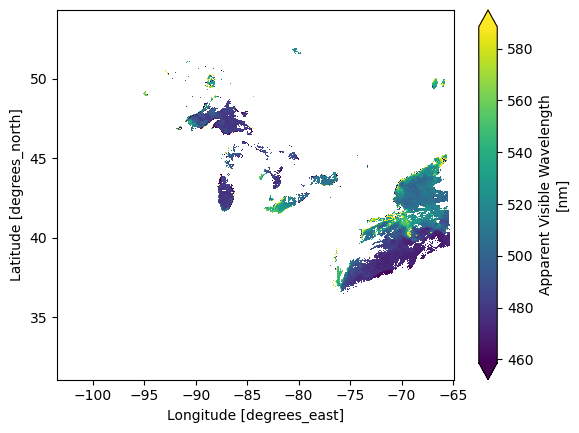

In [24]:
dataset = dataset.set_coords(("longitude", "latitude"))
artist = dataset["avw"].plot(x="longitude", y="latitude", cmap="viridis", robust="true")

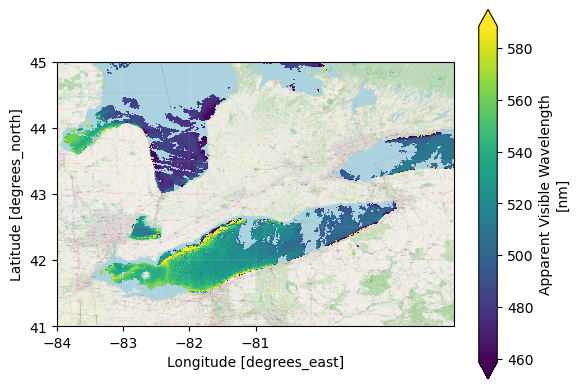

In [25]:
fig = plt.figure()
extent = (-84, -78, 41, 44)
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent(extent, crs=ccrs.PlateCarree())
ax.add_image(cimgt.OSM(), 10)
ax.gridlines(draw_labels=False, linewidth=0.3, color="white", alpha=0.7, linestyle="dotted")
ax.set_yticks([41, 42, 43, 44, 45], crs=ccrs.PlateCarree())
ax.set_xticks([-81, -82, -83, -84], crs=ccrs.PlateCarree())
artist = dataset["avw"].plot(x="longitude", y="latitude", cmap="viridis", robust=True)
plt.show()